# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv', thousands=',')

# Preliminary Data Exploration

In [6]:
df_data.shape

(4324, 9)

* Dataset contains 4324 rows and 9 columns.

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

* Column names: `Unnamed: 0.1`, `Unnamed: 0`, `Organisation`, `Location`, `Date`, `Detail`, `Rocket_Status`, `Price`, `Mission_Status`.

In [8]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

There are 3360 NaN values in `Price`.

In [9]:
df_data.duplicated().sum()

0

* There's no duplicated value.

## Data Cleaning - Check for Missing Values and Duplicates

In [10]:
# Make a copy of original dataset to work with
df = df_data

# Convert column names to lowercase to make coding convenient
df.columns = df.columns.str.lower()

# Drop two redundant index columns and `detail` column
df = df_data.drop(columns=['unnamed: 0.1', 'unnamed: 0', 'detail'], axis=1)
df.head()

organisation                                           location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         date rocket_status  price mission_status  
0  Fri Aug 07, 2020 05:12 UTC  StatusActive  50.00        Success  
1  Thu Aug 06, 2020 04:01 UTC  StatusActive  29.75        Success  
2  Tue Aug 04, 2020 23:57 UTC  StatusActive    NaN        Success  
3  Thu Jul 30, 2020 21:25 UTC  StatusActive  65.00        Success  
4  Thu Jul 30, 2020 11:50 UTC  StatusActive 145.00        Success

## Descriptive Statistics

In [11]:
df.describe(include='all')

organisation                                    location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   
mean            NaN                                         NaN   
std             NaN                                         NaN   
min             NaN                                         NaN   
25%             NaN                                         NaN   
50%             NaN                                         NaN   
75%             NaN                                         NaN   
max             NaN                                         NaN   

                              date  rocket_status    price mission_status  
count                         4324           4324   964.00           4324  
unique                        4319              2      NaN              4  
top     Wed Nov 05, 2008 00:15 UTC  StatusRetired      NaN        Success  
freq                             2           3534      NaN           3879  
mean                           NaN            NaN   153.79            NaN  
std                            NaN            NaN   288.45            NaN  
min                            NaN            NaN     5.30            NaN  
25%                            NaN            NaN    40.00            NaN  
50%                            NaN            NaN    62.00            NaN  
75%                            NaN            NaN   164.00            NaN  
max                            NaN            NaN 5,000.00            NaN

* In **56** organisations, **RVSN USSR** is the one with the most launches (1777).
* In **137** locations, **Site 31/6, Baikonur Cosmodrome, Kazakhstan** is the one with the most lauches (235).
* There was two launches at the same time on **Wed Nov 05, 2008 00:15 UTC**.
* Most of rockets are **StatusRetired** (3534).
* Most of missions were **Success** (3879).
* In `price`, the **mean** value (153.79) is larger than **median** value (40), so the distribution is likely **skew right**. There is also huge deviation from the **max** value (5000).

# Number of Launches per Company

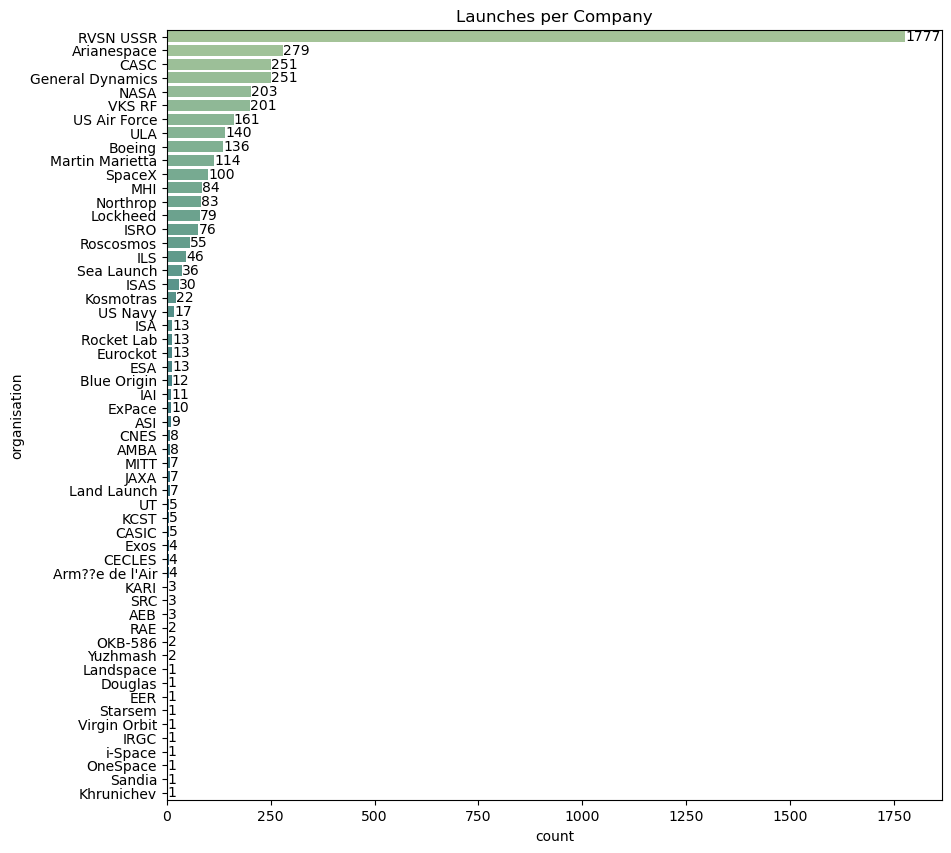

In [12]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y='organisation',
                   data=df,
                   order=df['organisation'].value_counts().index,
                   orient='horizontal',
                   palette='crest')
ax.set_title('Launches per Company')
ax.bar_label(ax.containers[0])
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [13]:
df['rocket_status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: rocket_status, dtype: int64

* 3534 rockets are retired, 790 are still active.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [14]:
df['mission_status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: mission_status, dtype: int64

* 3879 missions are success, 339 are failure. Furthermore, there are 102 partial failure and 4 prelaunch failure.

# How Expensive are the Launches?

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   organisation    4324 non-null   object 
 1   location        4324 non-null   object 
 2   date            4324 non-null   object 
 3   rocket_status   4324 non-null   object 
 4   price           964 non-null    float64
 5   mission_status  4324 non-null   object 
dtypes: float64(1), object(5)
memory usage: 202.8+ KB


* Only 964 values of `price` are non-null.

In [16]:
# Drop NA
df_price = df.dropna().reset_index(drop=True)

# Convert `price` to float
df_price['price'] = df_price['price'].astype('float')

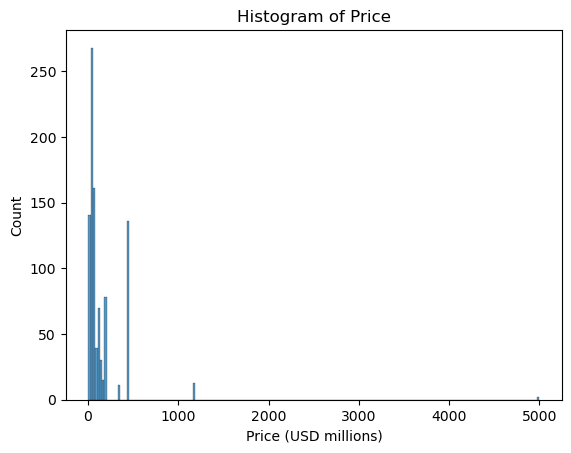

In [17]:
sns.histplot(data=df_price['price'])
plt.title('Histogram of Price')
plt.xlabel('Price (USD millions)')
plt.show()

* There are likely some outliers with price 1000-5000 millions.

# Use a Choropleth Map to Show the Number of Launches by Country

In [18]:
# Create new column `country` from `location`
df['country'] = df['location']
df['country'] = df['country'].str.split(pat=',').str[-1]
df['country'] = df['country'].str.strip()

# Replace some country names to work with ISO3166 later
dict = {'Russia': 'Russian Federation',
        'New Mexico': 'USA',
        'Yellow Sea': 'China',
        'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
        'Pacific Missile Range Facility': 'USA',
        'Barents Sea': 'Russian Federation',
        'Iran': 'Iran, Islamic Republic of',
        'North Korea': "Korea, Democratic People's Republic of",
        'South Korea': 'Korea, Republic of',
        'Gran Canaria': 'USA'}
df = df.replace({'country': dict})
df.head()
df['country'].value_counts()

Russian Federation                        1398
USA                                       1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Pacific Ocean                               36
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: country, dtype: int64

In [19]:
# Exclude data with 'Pacific Ocean' in `country`
df = df[df['country'] != 'Pacific Ocean']
df['country'].value_counts()

Russian Federation                        1398
USA                                       1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: country, dtype: int64

In [20]:
# Create new column `country_code` from `country` and convert its values to Alpha 3 country code
df['country_code'] = df['country']
df['country_code'] = df['country_code'].apply(countries.get).str[2]
df.head()

organisation                                           location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         date rocket_status  price mission_status     country  \
0  Fri Aug 07, 2020 05:12 UTC  StatusActive  50.00        Success         USA   
1  Thu Aug 06, 2020 04:01 UTC  StatusActive  29.75        Success       China   
2  Tue Aug 04, 2020 23:57 UTC  StatusActive    NaN        Success         USA   
3  Thu Jul 30, 2020 21:25 UTC  StatusActive  65.00        Success  Kazakhstan   
4  Thu Jul 30, 2020 11:50 UTC  StatusActive 145.00        Success         USA   

  country_code  
0          USA  
1          CHN  
2          USA  
3          KAZ  
4          USA

In [21]:
df_launches = df['country_code'].value_counts()
fig = px.choropleth(locations=df_launches.index,
                    color=df_launches.values,
                    color_continuous_scale="Matter"
                    )
fig.update_layout(title_text='Number of Launches by Country',
                  title_x=0.5
                 )
fig.show()

* Russia and USA are the countries with the most launches. Russia (1398) is slightly more than USA (1351).

# Use a Choropleth Map to Show the Number of Failures by Country


In [22]:
df_failure = df[df['mission_status'] == 'Failure']
df_failure = df_failure['country_code'].value_counts()
fig = px.choropleth(locations=df_failure.index,
                    color=df_failure.values,
                    color_continuous_scale="Matter"
                    )
fig.update_layout(title_text='Number of Failures by Country',
                  title_x=0.5
                 )
fig.show()

* USA has the most failures.
* Russian has half as many failures as USA does, while having similar number of launches.

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [23]:
df_status = df.groupby(['country', 'organisation'])['mission_status'].value_counts().reset_index(name='count')
df_status

country  organisation   mission_status  count
0    Australia          AMBA          Success      1
1    Australia        CECLES          Failure      2
2    Australia        CECLES          Success      1
3    Australia           RAE          Failure      1
4    Australia           RAE          Success      1
..         ...           ...              ...    ...
125        USA  US Air Force  Partial Failure      2
126        USA       US Navy          Failure     14
127        USA       US Navy          Success      2
128        USA       US Navy  Partial Failure      1
129        USA  Virgin Orbit          Failure      1

[130 rows x 4 columns]

In [24]:
fig = px.sunburst(df_status,
                   path=['country', 'organisation', 'mission_status'],
                   values='count'
                  )
fig.update_layout(title_text='Mission Status by Country/Company',
                  title_x=0.5
                 )
fig.show()

* Comparing to Russia and Kazakhstan, USA has much more variety of organisations in space mission.

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [25]:
total_by_org = df_price.groupby('organisation')['price'].sum().reset_index(name='total_spent')
total_by_org.sort_values(by='total_spent', ascending=False)

organisation  total_spent
14             NASA    76,280.00
0       Arianespace    16,345.00
21              ULA    14,798.00
16        RVSN USSR    10,000.00
2              CASC     6,340.26
20           SpaceX     5,444.00
15         Northrop     3,930.00
12              MHI     3,532.50
8              ISRO     2,177.00
22     US Air Force     1,550.92
23           VKS RF     1,548.90
7               ILS     1,320.00
1            Boeing     1,241.00
18        Roscosmos     1,187.50
13  Martin Marietta       721.40
10        Kosmotras       638.00
5          Eurockot       543.40
11         Lockheed       280.00
9              JAXA       168.00
17       Rocket Lab        97.50
4               ESA        37.00
6            ExPace        28.30
3               EER        20.00
19           Sandia        15.00
24     Virgin Orbit        12.00

* NASA is the biggest spender with 76,280 millions USD, abruptly more than the second place, Arianespace (16,345).

# Analyse the Amount of Money Spent by Organisation per Launch

In [26]:
mean_by_org = df_price.groupby('organisation')['price'].mean().reset_index(name='average_spent')
mean_by_org.sort_values(by='average_spent', ascending=False)

organisation  average_spent
16        RVSN USSR       5,000.00
14             NASA         511.95
1            Boeing         177.29
0       Arianespace         170.26
21              ULA         151.00
7               ILS         101.54
12              MHI          95.47
13  Martin Marietta          80.16
22     US Air Force          59.65
9              JAXA          56.00
20           SpaceX          54.99
18        Roscosmos          51.63
15         Northrop          47.35
23           VKS RF          46.94
5          Eurockot          41.80
2              CASC          40.13
4               ESA          37.00
11         Lockheed          35.00
8              ISRO          32.49
10        Kosmotras          29.00
6            ExPace          28.30
3               EER          20.00
19           Sandia          15.00
24     Virgin Orbit          12.00
17       Rocket Lab           7.50

* Surprisingly, RVSN USSR is the organisation with the largest average spending with 5000 millions USD each launch.
* But we should consider that RVSN USSR has total of 10,000 millions USD spent, it means that there are only 2 launches with cost data gathered.

# Chart the Number of Launches per Year

In [27]:
# COnvert `date` to datetime
df['date'] = pd.to_datetime(df['date'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   organisation    4288 non-null   object             
 1   location        4288 non-null   object             
 2   date            4166 non-null   datetime64[ns, UTC]
 3   rocket_status   4288 non-null   object             
 4   price           964 non-null    float64            
 5   mission_status  4288 non-null   object             
 6   country         4288 non-null   object             
 7   country_code    4288 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 301.5+ KB
None


organisation                                           location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                       date rocket_status  price mission_status     country  \
0 2020-08-07 05:12:00+00:00  StatusActive  50.00        Success         USA   
1 2020-08-06 04:01:00+00:00  StatusActive  29.75        Success       China   
2 2020-08-04 23:57:00+00:00  StatusActive    NaN        Success         USA   
3 2020-07-30 21:25:00+00:00  StatusActive  65.00        Success  Kazakhstan   
4 2020-07-30 11:50:00+00:00  StatusActive 145.00        Success         USA   

  country_code  
0          USA  
1          CHN  
2          USA  
3          KAZ  
4          USA

In [28]:
# Extract `year` from `date`
df['year'] = df['date'].dt.year.astype('Int64', errors='ignore')
df

organisation                                           location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                          date  rocket_status  price mission_status  \
0    2020-08-07 05:12:00+00:00   StatusActive  50.00        Success   
1    2020-08-06 04:01:00+00:00   StatusActive  29.75        Success   
2    2020-08-04 23:57:00+00:00   StatusActive    NaN        Success   
3    2020-07-30 21:25:00+00:00   StatusActive  65.00        Success   
4    2020-07-30 11:50:00+00:00   StatusActive 145.00        Success   
...                        ...            ...    ...            ...   
4319 1958-02-05 07:33:00+00:00  StatusRetired    NaN        Failure   
4320 1958-02-01 03:48:00+00:00  StatusRetired    NaN        Success   
4321 1957-12-06 16:44:00+00:00  StatusRetired    NaN        Failure   
4322 1957-11-03 02:30:00+00:00  StatusRetired    NaN        Success   
4323 1957-10-04 19:28:00+00:00  StatusRetired    NaN        Success   

         country country_code  year  
0            USA          USA  2020  
1          China          CHN  2020  
2            USA          USA  2020  
3     Kazakhstan          KAZ  2020  
4            USA          USA  2020  
...          ...          ...   ...  
4319         USA          USA  1958  
4320         USA          USA  1958  
4321         USA          USA  1957  
4322  Kazakhstan          KAZ  1957  
4323  Kazakhstan          KAZ  1957  

[4288 rows x 9 columns]

In [29]:
launch_by_year = df[['year']].value_counts().reset_index(name='count').sort_values(by='year').reset_index(drop=True)
launch_by_year

year  count
0   1957      3
1   1958     22
2   1959     20
3   1960     38
4   1961     52
..   ...    ...
59  2016     88
60  2017     90
61  2018    117
62  2019    107
63  2020     63

[64 rows x 2 columns]

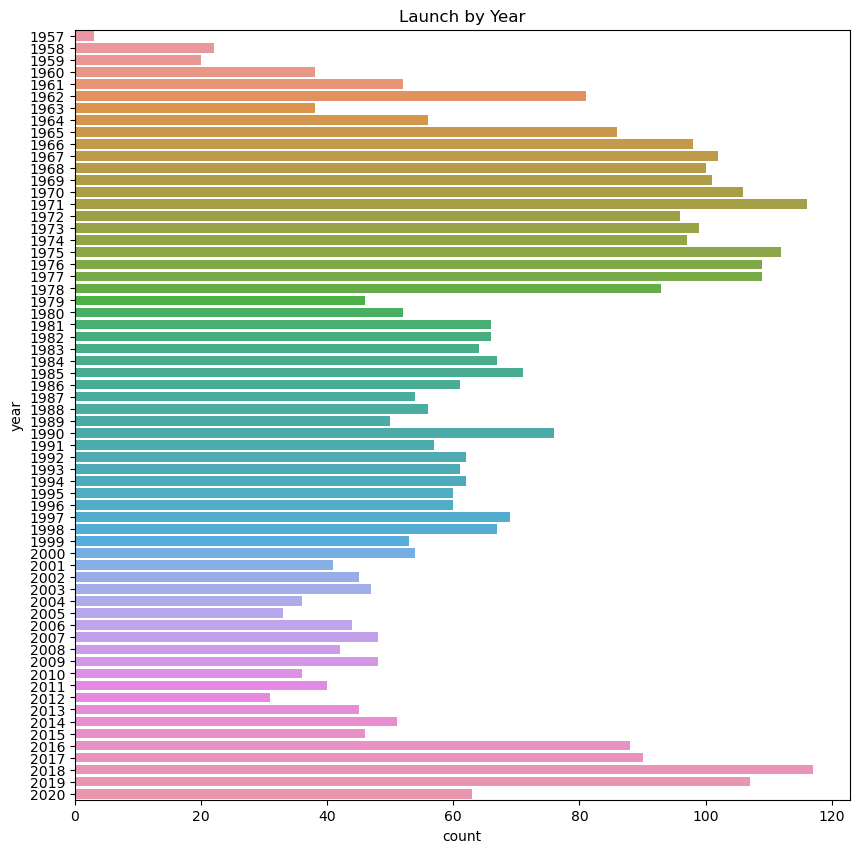

In [30]:
plt.figure(figsize=(10, 10))
fig = sns.barplot(data=launch_by_year,
                  x='count',
                  y='year',
                  orient='h'
                 )
fig.set_title('Launch by Year')
plt.show()

* 1971 and 2018-2019 are the most busy years for launching.
* 1975-1977 are the second period to have notice.

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [31]:
# Extract `month` from `date`
df['month'] = df['date'].dt.strftime('%B')

# Make `month` categorical values and sorted by usual order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [32]:
df['year_month'] = df['date'].dt.strftime('%Y-%B')
df.head()

organisation                                           location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                       date rocket_status  price mission_status     country  \
0 2020-08-07 05:12:00+00:00  StatusActive  50.00        Success         USA   
1 2020-08-06 04:01:00+00:00  StatusActive  29.75        Success       China   
2 2020-08-04 23:57:00+00:00  StatusActive    NaN        Success         USA   
3 2020-07-30 21:25:00+00:00  StatusActive  65.00        Success  Kazakhstan   
4 2020-07-30 11:50:00+00:00  StatusActive 145.00        Success         USA   

  country_code  year   month   year_month  
0          USA  2020  August  2020-August  
1          CHN  2020  August  2020-August  
2          USA  2020  August  2020-August  
3          KAZ  2020    July    2020-July  
4          USA  2020    July    2020-July

In [33]:
df_year_month = df[['year', 'month']].value_counts().reset_index(name='count').sort_values(by=['year', 'month']).reset_index(drop=True)

# Create `ma20` column
df_year_month['ma20'] = df_year_month['count'].rolling(20).mean()

# Combine `year` and `month` into new `year_month` columns
df_year_month['year_month'] = pd.to_datetime(df_year_month['year'].astype(str) + '-' + df_year_month['month'].astype(str))
df_year_month

year     month  count  ma20 year_month
0    1957   October      1   NaN 1957-10-01
1    1957  November      1   NaN 1957-11-01
2    1957  December      1   NaN 1957-12-01
3    1958  February      2   NaN 1958-02-01
4    1958     March      3   NaN 1958-03-01
..    ...       ...    ...   ...        ...
741  2020     April      5  9.20 2020-04-01
742  2020       May      9  9.25 2020-05-01
743  2020      June      7  9.05 2020-06-01
744  2020      July     14  9.10 2020-07-01
745  2020    August      3  8.50 2020-08-01

[746 rows x 5 columns]

In [34]:
fig = px.line(df_year_month,
              x='year_month',
              y=['count', 'ma20'],
              hover_data={"year_month": "|%B, %Y"}
             )
fig.update_layout(title='Number of Launches Month-on-Month',
                  title_x=0.5,
                  width=1000,
                  height=500
                 )
fig.update_xaxes(tickformat='%Y',
                 dtick='M60'
                )
fig.show()

* The chart reveals that from late 1960s to late 1970s was the hottest period of space mission.
* At the present time, there is a uptrend from 2016 until now.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [35]:
launch_by_month = df[['month']].value_counts().reset_index(name='count')
launch_by_month

month  count
0    December    429
1        June    380
2     October    372
3       April    363
4      August    356
5   September    352
6       March    345
7        July    345
8    November    324
9    February    321
10        May    317
11    January    262

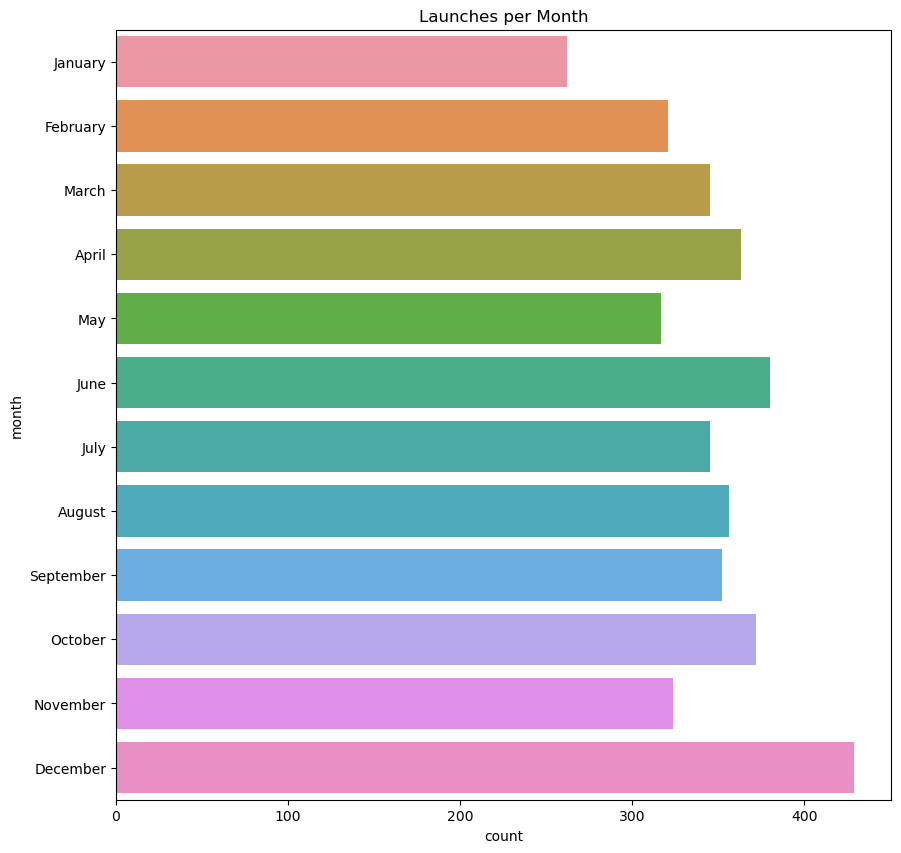

In [36]:
plt.figure(figsize=(10, 10))
fig = sns.barplot(data=launch_by_month,
                  x='count',
                  y='month'
                 )
fig.set_title('Launches per Month')
plt.show()

* December is likely the most trusted month for space mission.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [37]:
price_by_year = df.groupby('year')['price'].mean().reset_index(name='average_spent')
price_by_year

year  average_spent
0   1957            NaN
1   1958            NaN
2   1959            NaN
3   1960            NaN
4   1961            NaN
..   ...            ...
59  2016          79.46
60  2017          69.49
61  2018          64.75
62  2019          59.61
63  2020          56.65

[64 rows x 2 columns]

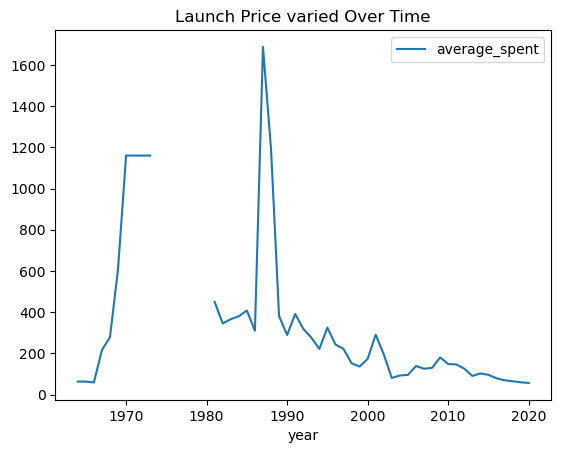

In [38]:
price_by_year.plot(kind='line',
                   x='year',
                   y='average_spent'
                  )
plt.title('Launch Price varied Over Time')
plt.show()

* The picture is incomplete, but there is likely a decline in trend from the end of the Cold War until now.

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [39]:
top_org = df[['organisation']].value_counts().reset_index(name='count')[:10]
top_org

organisation  count
0         RVSN USSR   1777
1       Arianespace    279
2  General Dynamics    251
3              CASC    251
4              NASA    203
5            VKS RF    201
6      US Air Force    161
7               ULA    140
8            Boeing    136
9   Martin Marietta    114

In [40]:
mask = df['organisation'].isin(top_org['organisation'])
df_top = df[mask]
df_top = df_top[['organisation', 'year']].value_counts().reset_index(name='count')
df_top

organisation  year  count
0           RVSN USSR  1976     93
1           RVSN USSR  1977     92
2           RVSN USSR  1971     90
3           RVSN USSR  1975     88
4           RVSN USSR  1970     86
..                ...   ...    ...
317  General Dynamics  1989      1
318   Martin Marietta  1986      1
319              NASA  1959      1
320              CASC  1985      1
321              CASC  1991      1

[322 rows x 3 columns]

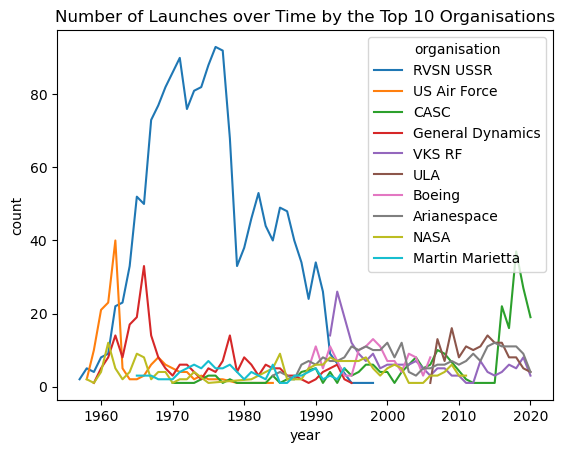

In [41]:
top_fig = sns.lineplot(data=df_top,
                       x='year',
                       y='count',
                       hue='organisation'
                      )
plt.title('Number of Launches over Time by the Top 10 Organisations')
plt.show()

* RVSN USSR was once the busiest organisation. According to the number of launches, RVSN USSR dominated the space mission in the 1970s-1980s.
* In the present time, CASC is the one with the most launching.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [42]:
df['country_code'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: country_code, dtype: int64

In [43]:
mask = (df['country_code'].isin(['USA', 'RUS', 'KAZ'])) & (df['year'] <= 1991)
df_cw = df[mask]
df_cw.country_code.value_counts()

RUS    1146
USA     644
KAZ     563
Name: country_code, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [44]:
dict = {'Russian Federation': 'USSR',
        'Kazakhstan': 'USSR'}
df_cw = df_cw.replace({'country': dict})
by_country = df_cw[['country']].value_counts().reset_index(name='count')
by_country

country  count
0    USSR   1709
1     USA    644

In [45]:
fig = px.pie(by_country,
             names='country',
             values='count'
            )
fig.update_layout(title_text='Total number of launches of the USSR and the USA',
                  title_x=0.5
                 )
fig.show()

* In the Cold War, USSR had much more launches than USA, by over 2.5 times.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [46]:
cw_by_year = df_cw[['country', 'year']].value_counts().reset_index(name='count')
cw_by_year

country  year  count
0     USSR  1976     93
1     USSR  1977     92
2     USSR  1971     90
3     USSR  1975     88
4     USSR  1970     87
..     ...   ...    ...
65     USA  1986      6
66    USSR  1958      5
67    USSR  1959      4
68    USSR  1957      2
69     USA  1957      1

[70 rows x 3 columns]

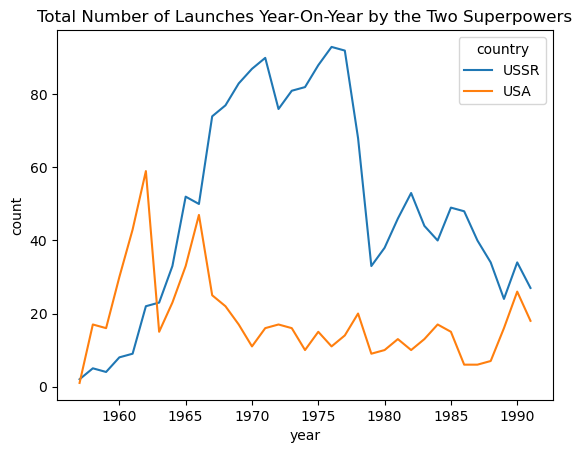

In [47]:
fig = sns.lineplot(data=cw_by_year,
                   x='year',
                   y='count',
                   hue='country'
                  )
fig.set_title('Total Number of Launches Year-On-Year by the Two Superpowers')
plt.show()

* USSR dominated from 1965 to the end of the Cold War.

## Chart the Total Number of Mission Failures Year on Year.

In [48]:
mask = df_cw['mission_status'] == 'Failure'
df_failure = df_cw[mask]
failure_by_year_cw = df_failure[['year']].value_counts().reset_index(name='count')
failure_by_year_cw

year  count
0   1960     19
1   1961     17
2   1958     14
3   1962     14
4   1969     14
5   1965     10
6   1971     10
7   1959      9
8   1963      9
9   1967      8
10  1964      7
11  1966      7
12  1970      7
13  1972      7
14  1975      6
15  1974      5
16  1977      4
17  1968      4
18  1985      4
19  1986      3
20  1973      3
21  1991      3
22  1980      2
23  1981      2
24  1982      2
25  1990      2
26  1983      1
27  1984      1
28  1978      1
29  1976      1
30  1987      1
31  1989      1
32  1957      1

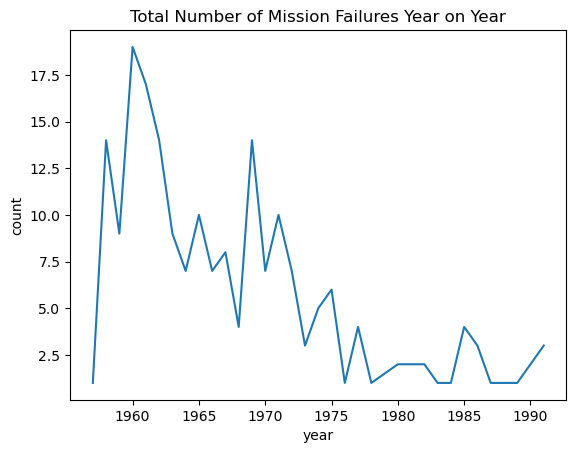

In [49]:
fig = sns.lineplot(data=failure_by_year_cw,
                   x='year',
                   y='count'
                  )
fig.set_title('Total Number of Mission Failures Year on Year')
plt.show()

* The chart shows a downtrend of total failures. It is likely the safety of space mission has been increased.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [50]:
status_percent = df_cw.groupby('year')['mission_status'].value_counts(normalize=True)*100
status_percent = status_percent.reset_index(name='percent')
mask = status_percent['mission_status'] == 'Failure'
failure_percent_cw = status_percent[mask]
failure_percent_cw

year mission_status  percent
1   1957        Failure    33.33
2   1958        Failure    63.64
5   1959        Failure    45.00
8   1960        Failure    50.00
11  1961        Failure    32.69
14  1962        Failure    17.28
17  1963        Failure    23.68
19  1964        Failure    12.50
22  1965        Failure    11.76
26  1966        Failure     7.22
29  1967        Failure     8.08
33  1968        Failure     4.04
35  1969        Failure    14.00
38  1970        Failure     7.14
41  1971        Failure     9.43
44  1972        Failure     7.53
47  1973        Failure     3.09
49  1974        Failure     5.43
52  1975        Failure     5.83
55  1976        Failure     0.96
57  1977        Failure     3.77
60  1978        Failure     1.14
64  1980        Failure     4.17
67  1981        Failure     3.39
69  1982        Failure     3.17
72  1983        Failure     1.75
74  1984        Failure     1.75
77  1985        Failure     6.25
80  1986        Failure     5.56
83  1987        Failure     2.17
88  1989        Failure     2.50
90  1990        Failure     3.33
93  1991        Failure     6.67

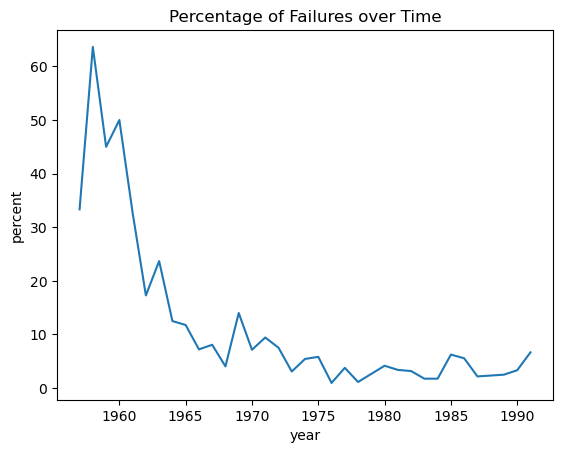

In [51]:
fig = sns.lineplot(data=failure_percent_cw,
                   x='year',
                   y='percent'
                  )
fig.set_title('Percentage of Failures over Time')
plt.show()

* The percent of failures shows the similar downtrend to confirm the confirmation of safety.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [52]:
df_country = df[['country', 'year']].value_counts().reset_index(name='count')
df_country

country  year  count
0    Russian Federation  1977     68
1    Russian Federation  1975     66
2    Russian Federation  1973     65
3    Russian Federation  1976     65
4    Russian Federation  1974     60
..                  ...   ...    ...
384               Japan  2008      1
385               Japan  2010      1
386           Australia  1969      1
387               China  2001      1
388           Australia  1968      1

[389 rows x 3 columns]

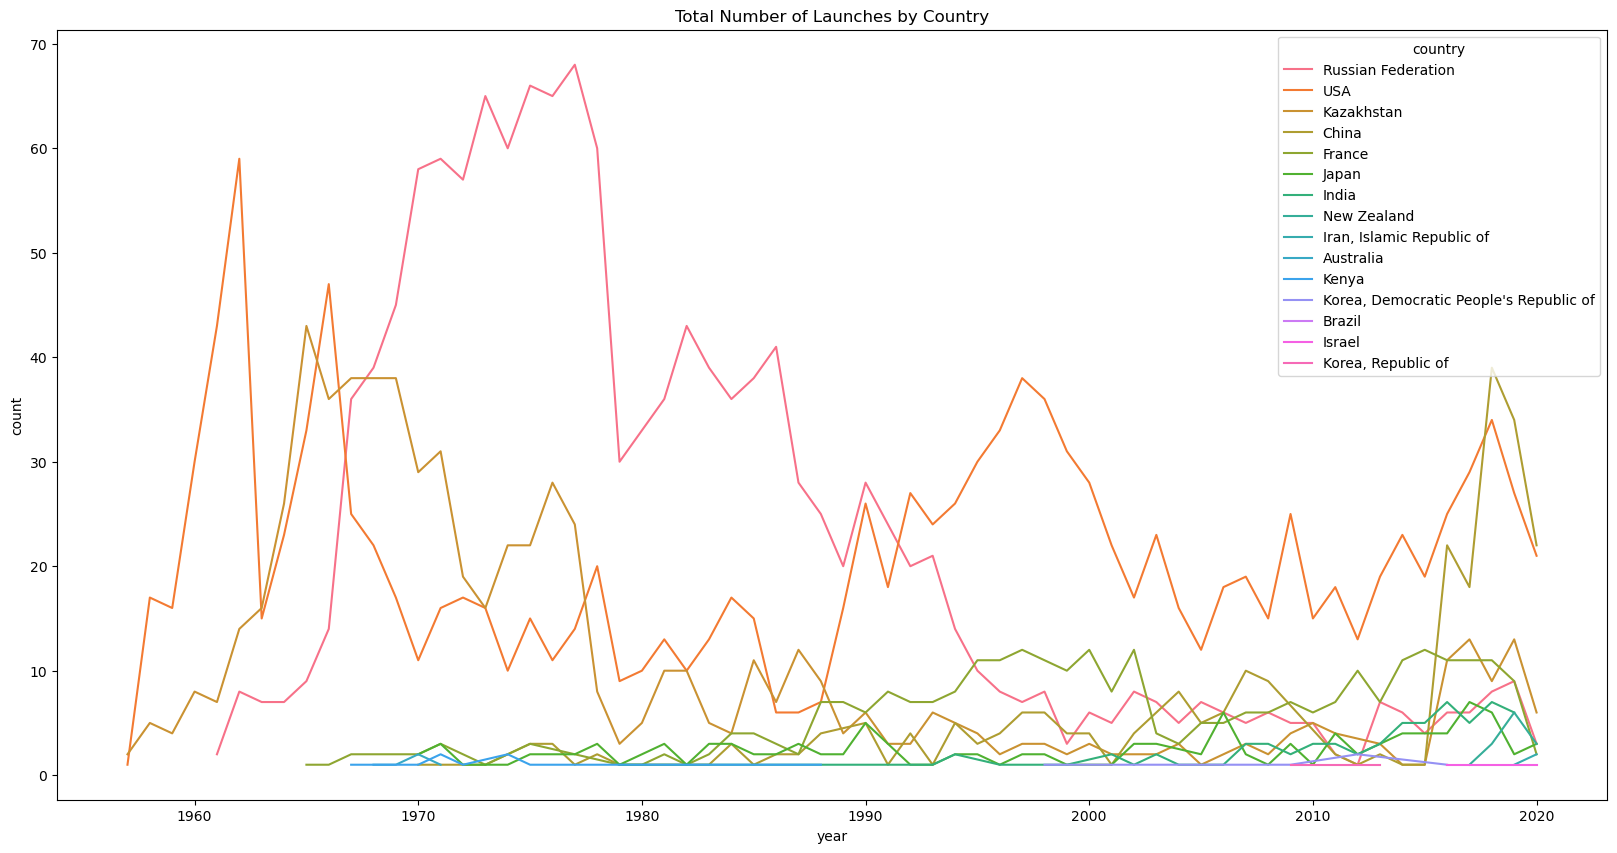

In [53]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(data=df_country,
                   x='year',
                   y='count',
                   hue='country'
                  )
fig.set_title('Total Number of Launches by Country')
plt.show()

* In the history, Russian is still the country has ever launched the most missions in a year, at peak as nearly 70.
* In the present time, USA and China are the rising powers. The peark number is 40.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [54]:
df_org = df[['organisation', 'year']].value_counts().reset_index(name='count')
df_org

organisation  year  count
0      RVSN USSR  1976     93
1      RVSN USSR  1977     92
2      RVSN USSR  1971     90
3      RVSN USSR  1975     88
4      RVSN USSR  1970     86
..           ...   ...    ...
613         KARI  2009      1
614         JAXA  2020      1
615         JAXA  2019      1
616         JAXA  2017      1
617      i-Space  2019      1

[618 rows x 3 columns]

In [55]:
mask = (df_org['year'] >= 1970) & (df_org['year'] < 1990)
df_70_80 = df_org[mask]
df_70_80

organisation  year  count
0      RVSN USSR  1976     93
1      RVSN USSR  1977     92
2      RVSN USSR  1971     90
3      RVSN USSR  1975     88
4      RVSN USSR  1970     86
..           ...   ...    ...
588         ISRO  1987      1
590         ISRO  1983      1
591         ISRO  1981      1
592         ISRO  1980      1
593         ISRO  1979      1

[171 rows x 3 columns]

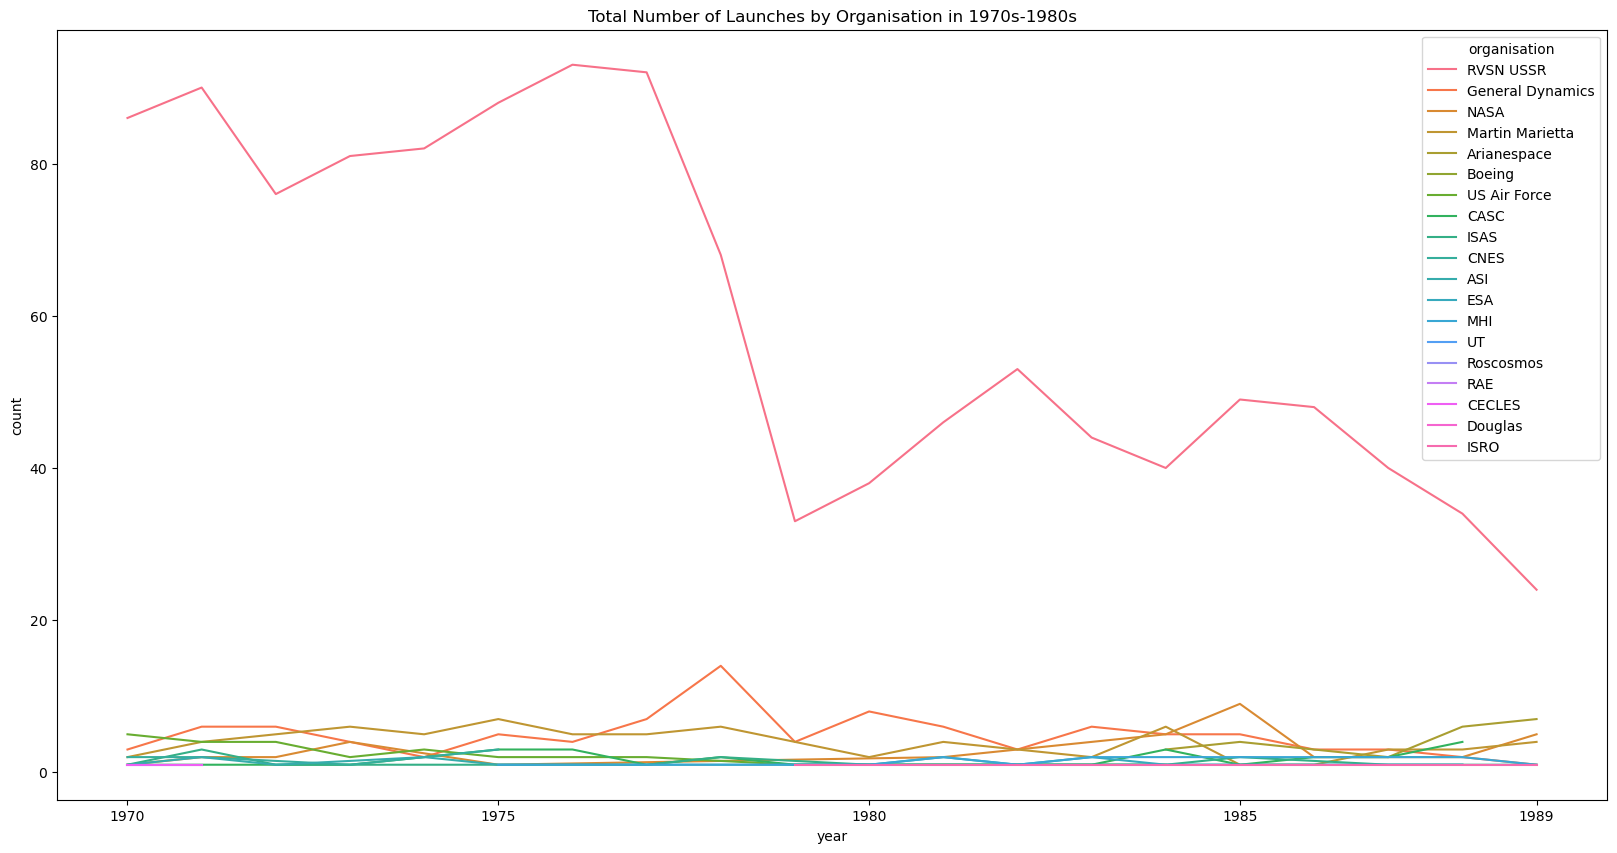

In [56]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(data=df_70_80,
                   x='year',
                   y='count',
                   hue='organisation'
                  )
fig.set_title('Total Number of Launches by Organisation in 1970s-1980s')
fig.set_xticks([1970, 1975, 1980, 1985, 1989])
plt.show()

* The number of launches from RVSN USSR declined hard from 1970s to the end of 1980s. It might be a sign to the end of the Cold War.

In [57]:
mask = (df_org['year'] >= 2018) & (df_org['year'] <= 2020)
df_2018_2020 = df_org[mask]
df_2018_2020

organisation  year  count
23           CASC  2018     37
29           CASC  2019     27
37         SpaceX  2018     21
41           CASC  2020     19
47         SpaceX  2020     14
53         SpaceX  2019     13
54      Roscosmos  2019     13
66      Roscosmos  2018     11
75    Arianespace  2018     11
86    Arianespace  2019      9
101           ULA  2018      8
119        VKS RF  2019      8
139          ISRO  2018      7
154          ISRO  2019      6
155    Rocket Lab  2019      6
199        VKS RF  2018      5
208           ULA  2019      5
211        ExPace  2019      5
232           MHI  2018      4
255   Arianespace  2020      4
259           ULA  2020      4
269     Roscosmos  2020      4
273        ExPace  2020      3
282   Blue Origin  2019      3
286          Exos  2019      3
297        VKS RF  2020      3
311    Rocket Lab  2018      3
312    Rocket Lab  2020      3
318      Northrop  2019      3
353      Northrop  2020      2
355      Northrop  2018      2
377           MHI  2020      2
390   Blue Origin  2018      2
404          JAXA  2018      2
431  Virgin Orbit  2020      1
444      OneSpace  2019      1
460      Eurockot  2018      1
465          Exos  2018      1
466        ExPace  2018      1
477           IAI  2020      1
478           ILS  2019      1
489          IRGC  2020      1
495           ISA  2020      1
496           ISA  2019      1
556     Landspace  2018      1
576           MHI  2019      1
614          JAXA  2020      1
615          JAXA  2019      1
617       i-Space  2019      1

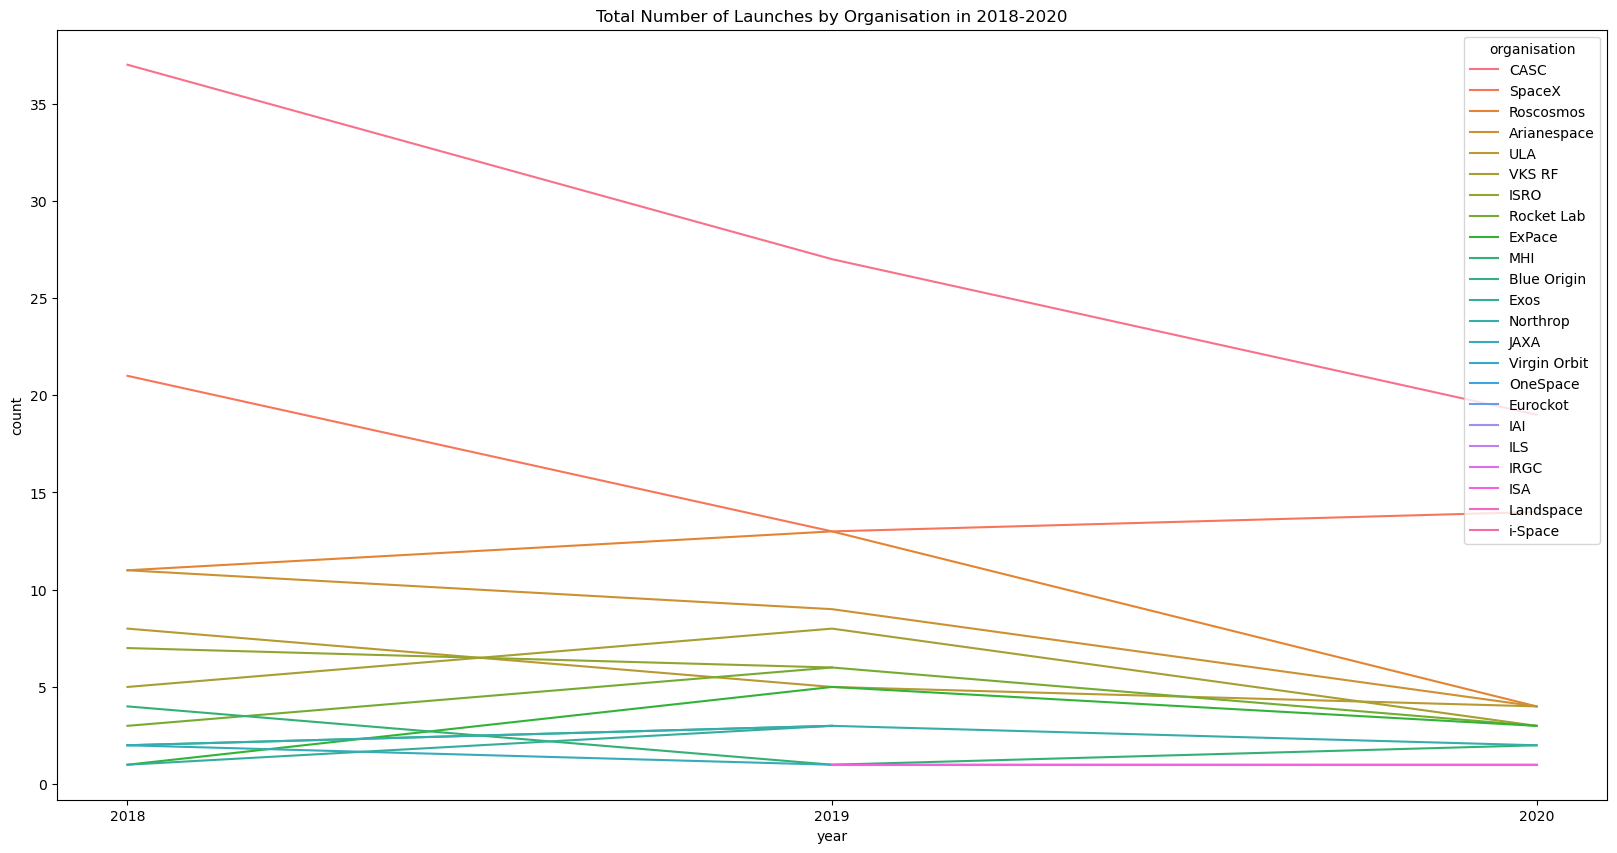

In [58]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(data=df_2018_2020,
                   x='year',
                   y='count',
                   hue='organisation'
                  )
fig.set_title('Total Number of Launches by Organisation in 2018-2020')
fig.set_xticks([2018, 2019, 2020])
plt.show()

* CASC and SpaceX are the rising stars of the present time.
* 2020 was the pandemic year, only CASC and Roscosmos substained large number of launches as around 20.